In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
import time

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from xgboost import XGBRegressor

In [3]:
from functions_2 import create_table, create_pct_table, plot_name 
from functions_2 import regplot_poly, regplot_gaussian, regplot_lag, regplot_poly_lag, regplot_fourier_lag, regplot_poly_fourier_lag
from functions_2 import errorplot_poly, errorplot_lag, errorplot_fourier, errorplot_poly_lag, errorplot_fourier_lag, errorplot_poly_fourier_lag
from functions_2 import predict_pfl_recur, plot_pfl_recur, predict_pfl_dir, plot_pfl_dir, predict_pfl_dir_boosted, plot_pfl_dir_boosted

In [4]:
xls = pd.ExcelFile('voornamen_jongens.xlsx')
dataframe_jongens = {}

for sheet_name in xls.sheet_names:
    dataframe_jongens[sheet_name] = xls.parse(sheet_name)

In [5]:
xls = pd.ExcelFile('voornamen_meisjes.xlsx')
dataframe_meisjes = {}

for sheet_name in xls.sheet_names:
    dataframe_meisjes[sheet_name] = xls.parse(sheet_name)

In [6]:
for df in dataframe_jongens:
    dataframe_jongens[df].columns = ['België_rang', 'België_naam', 'België_aantal', 'Vlaanderen_rang',  'Vlaanderen_naam', 'Vlaanderen_aantal', 
                                     'Wallonië_rang',  'Wallonië_naam', 'Wallonië_aantal', 'Brussel_rang',  'Brussel_naam', 
                                     'Brussel_aantal']

for df in dataframe_meisjes:
    dataframe_meisjes[df].columns = ['België_rang', 'België_naam', 'België_aantal', 'Vlaanderen_rang',  'Vlaanderen_naam', 'Vlaanderen_aantal', 
                                     'Wallonië_rang',  'Wallonië_naam', 'Wallonië_aantal', 'Brussel_rang',  'Brussel_naam', 
                                     'Brussel_aantal']

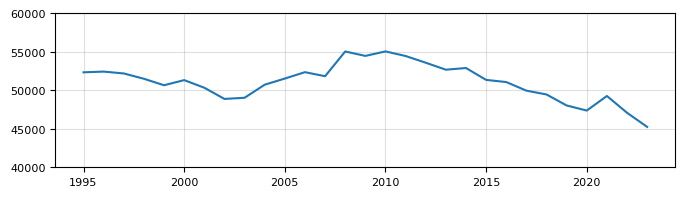

In [7]:
total_m = np.array([dataframe_jongens[df]['België_aantal'].sum() for df in dataframe_jongens])

plt.figure(figsize=(8,2))
plt.plot(np.arange(1995, 2024, 1), total_m[:-1]);
plt.grid(alpha=0.4);
plt.xticks(fontsize=8);
plt.yticks(fontsize=8);
plt.ylim(40000,60000);

In [8]:
pct_bel_m = create_pct_table(dataframe_jongens, 'België')
aantal_bel_m = create_table(dataframe_jongens, 'België', 'aantal')
rang_bel_m = create_table(dataframe_jongens, 'België', 'rang')
pct_bel_v = create_pct_table(dataframe_meisjes, 'België')
aantal_bel_v = create_table(dataframe_meisjes, 'België', 'aantal')
rang_bel_v = create_table(dataframe_meisjes, 'België', 'rang')

In [9]:
top_names_m = aantal_bel_m[aantal_bel_m.iloc[:,1:-1].max(axis=1) > 40].drop('1995-2023', axis=1)
top_names_v = aantal_bel_v[aantal_bel_v.iloc[:,1:-1].max(axis=1) > 40].drop('1995-2023', axis=1)
print(str(len(top_names_m)) + ', ' + str(len(top_names_v)))

617, 637


RMSE: 8.319



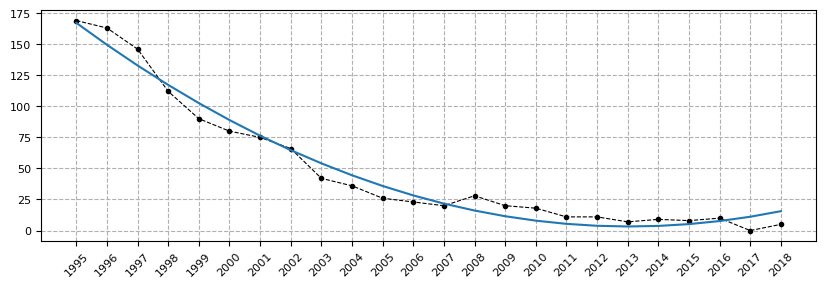

In [10]:
regplot_poly(top_names_m.iloc[:,:-5], 'Steven', 2)

RMSE: 5.768



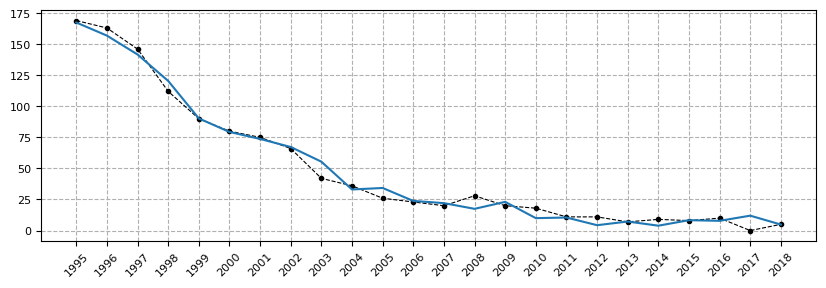

In [11]:
regplot_poly_lag(top_names_m.iloc[:,:-5], 'Steven', 2, 2)

RMSE: 22.045



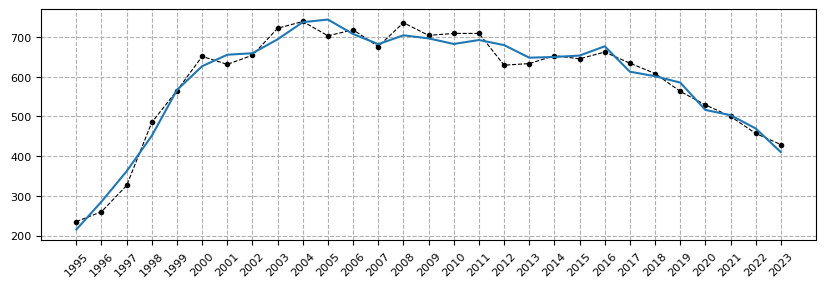

In [12]:
regplot_poly_lag(top_names_v, 'Emma', 2, 10)

RMSE: 7.942



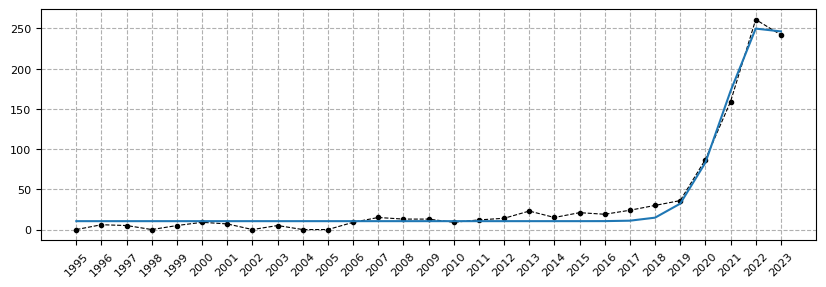

In [13]:
regplot_gaussian(top_names_v, 'Alba')

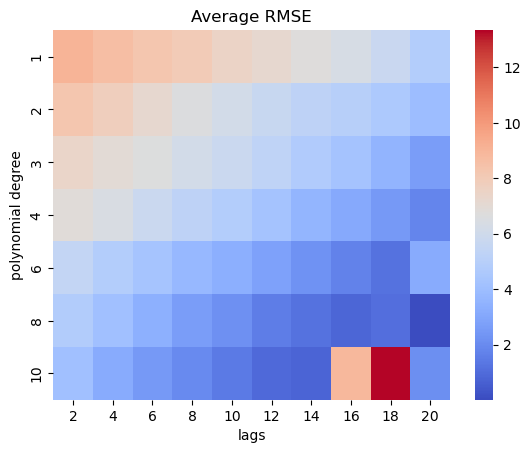

In [19]:
RMSE, RMSE_STD = errorplot_poly_lag(top_names_v[117:137], [1, 2, 3, 4, 6, 8, 10], [2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

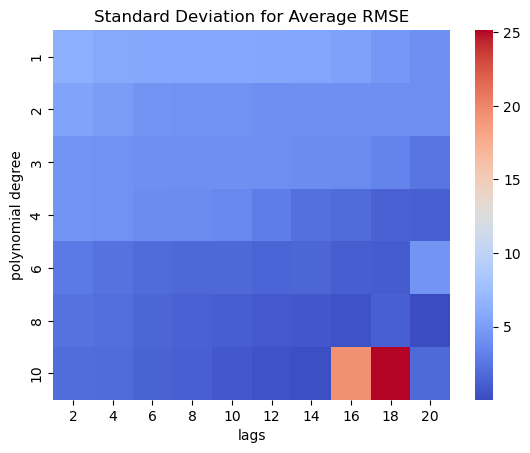

In [20]:
sns.heatmap(RMSE_STD, cmap='coolwarm', xticklabels=[2, 4, 6, 8, 10, 12, 14, 16, 18, 20], yticklabels=[1, 2, 3, 4, 6, 8, 10]);
plt.xlabel('lags');
plt.ylabel('polynomial degree');
plt.title('Standard Deviation for Average RMSE');

RMSE: 5.956



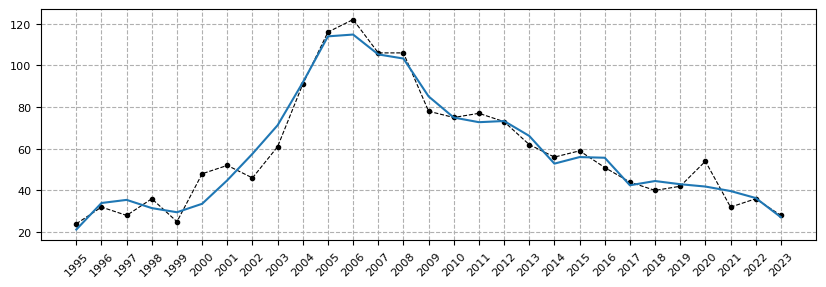

In [14]:
regplot_poly_lag(top_names_v, 'Floor', 6, 10)

RMSE: 1.916



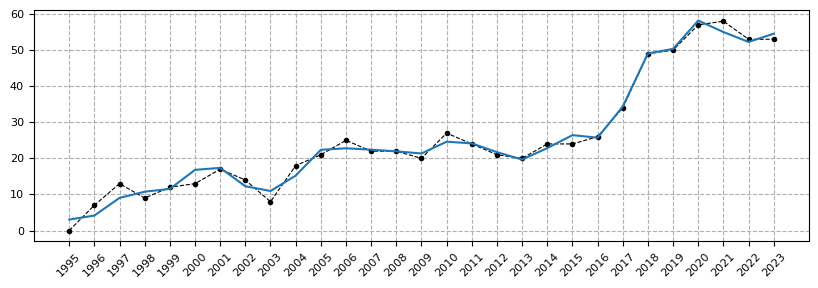

In [15]:
regplot_poly_lag(top_names_v, 'Agathe', 5, 16)

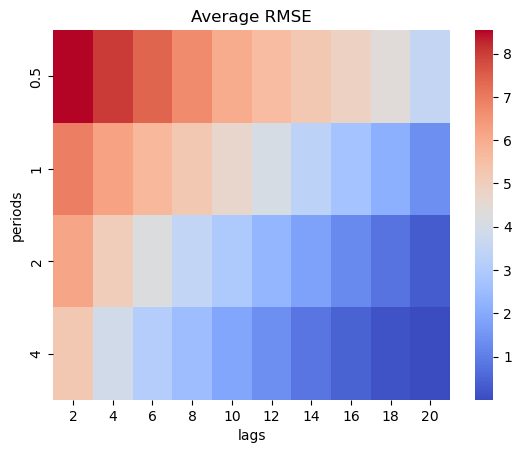

In [23]:
RMSE, RMSE_STD = errorplot_fourier_lag(top_names_v[300:330], [0.5, 1, 2, 4], [2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

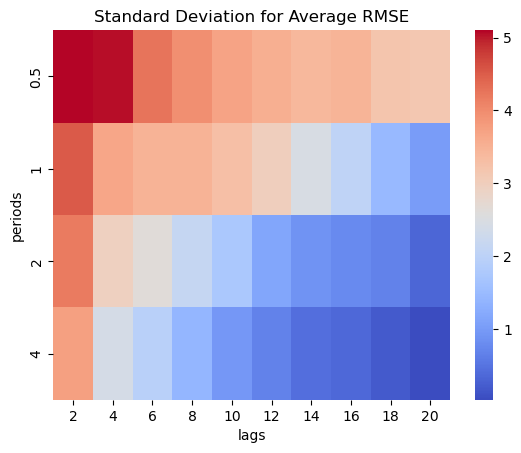

In [24]:
sns.heatmap(RMSE_STD, cmap='coolwarm', xticklabels=[2, 4, 6, 8, 10, 12, 14, 16, 18, 20], yticklabels=[0.5, 1, 2, 4]);
plt.xlabel('lags');
plt.ylabel('periods');
plt.title('Standard Deviation for Average RMSE');

RMSE: 0.585



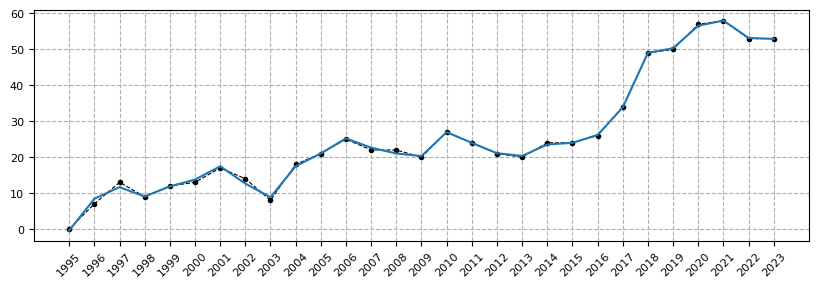

In [16]:
regplot_fourier_lag(top_names_v, 'Agathe', [0.5, 1, 2], 16)

RMSE: 18.286



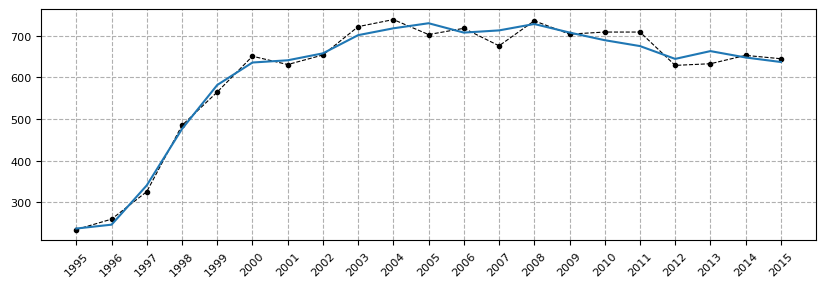

In [17]:
regplot_fourier_lag(top_names_v.iloc[:,:-8], 'Emma', [0.5, 1], 6)

RMSE: 0.269



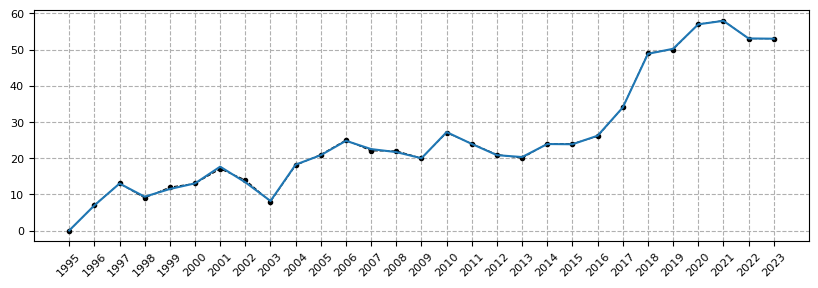

In [18]:
regplot_poly_fourier_lag(top_names_v, 'Agathe', 4, [0.5, 1, 2], 16)

RMSE: 5.882



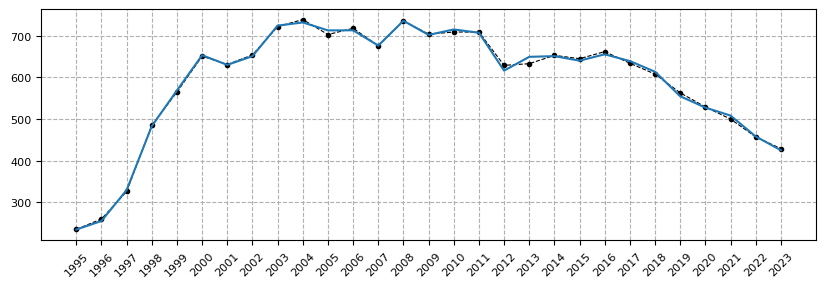

In [19]:
regplot_poly_fourier_lag(top_names_v, 'Emma', 4, [0.5, 1, 2], 16)

In [20]:
RMSE, RMSE_STD = errorplot_poly_fourier_lag(top_names_v[190:290], [2, 4, 6], [0.5, 1, 2], [2, 4, 6, 12])

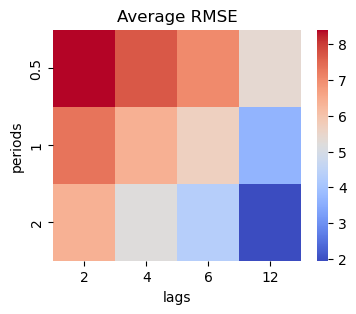

In [21]:
plt.figure(figsize=(4,3));
sns.heatmap(RMSE[0], cmap='coolwarm', xticklabels=[2, 4, 6, 12], yticklabels=[0.5, 1, 2]);
plt.xlabel('lags');
plt.ylabel('periods');
plt.title('Average RMSE');

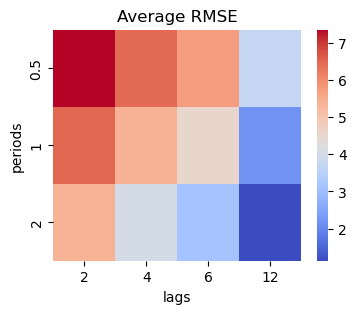

In [22]:
plt.figure(figsize=(4,3));
sns.heatmap(RMSE[1], cmap='coolwarm', xticklabels=[2, 4, 6, 12], yticklabels=[0.5, 1, 2]);
plt.xlabel('lags');
plt.ylabel('periods');
plt.title('Average RMSE');

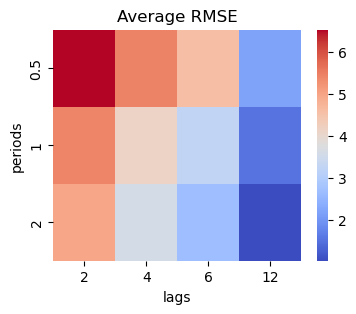

In [23]:
plt.figure(figsize=(4,3));
sns.heatmap(RMSE[2], cmap='coolwarm', xticklabels=[2, 4, 6, 12], yticklabels=[0.5, 1, 2]);
plt.xlabel('lags');
plt.ylabel('periods');
plt.title('Average RMSE');

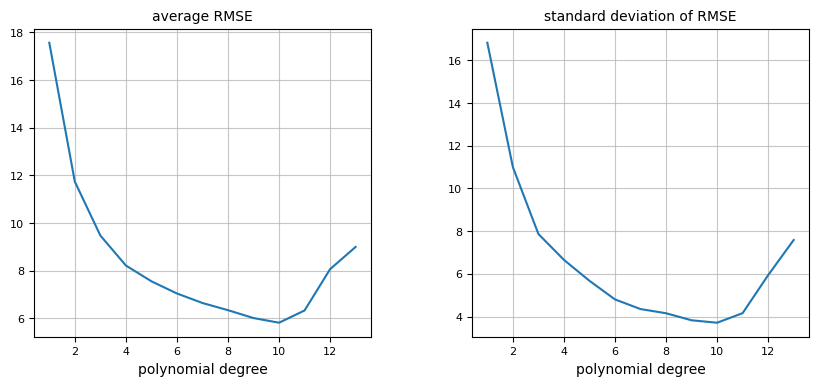

In [36]:
RMSE, RMSE_STD = errorplot_poly(top_names_v[50:150], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

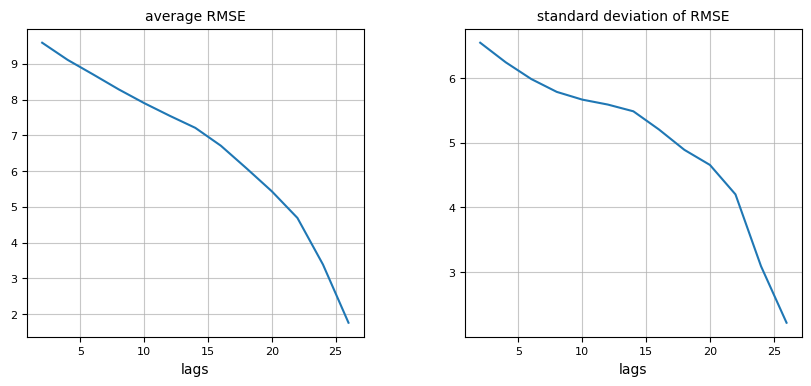

In [37]:
RMSE, RMSE_STD = errorplot_lag(top_names_v[50:150], [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26])

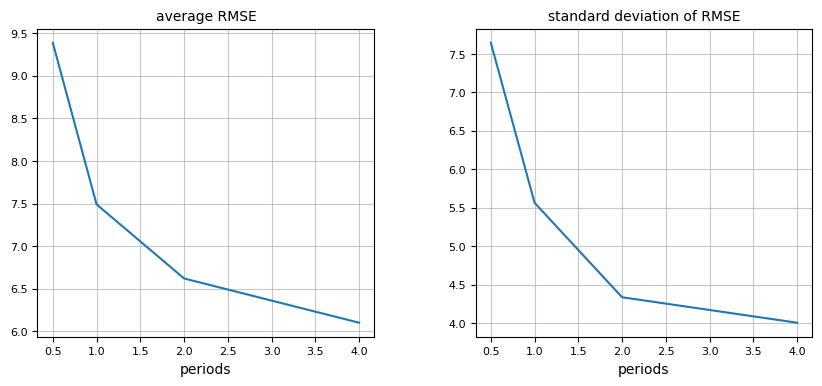

In [38]:
RMSE, RMSE_STD = errorplot_fourier(top_names_v[50:150], [0.5, 1, 2, 4])

RMSE: 22.73



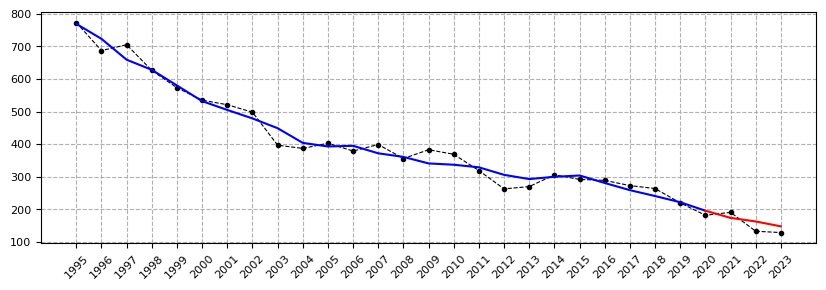

In [20]:
plot_pfl_recur(top_names_v, 'Charlotte', 3, 1, [0.5, 1], 3)

RMSE: 118.062



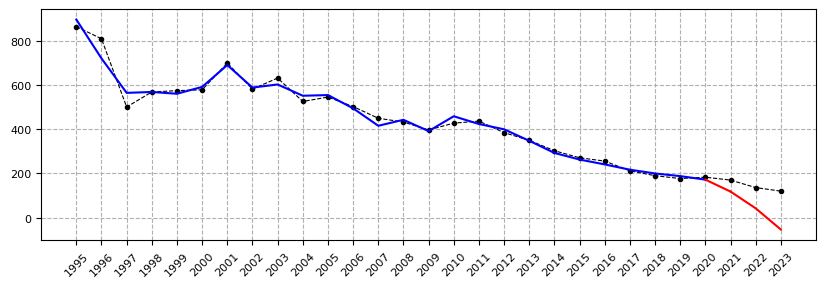

In [21]:
plot_pfl_recur(top_names_v, 'Julie', 3, 2, [0.5, 1], 8)

RMSE: 22.457



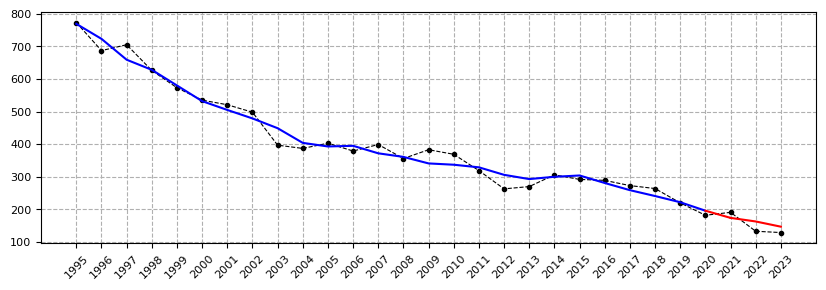

In [22]:
plot_pfl_dir(top_names_v, 'Charlotte', 3, 1, [0.5, 1], 3)

RMSE: 10.1



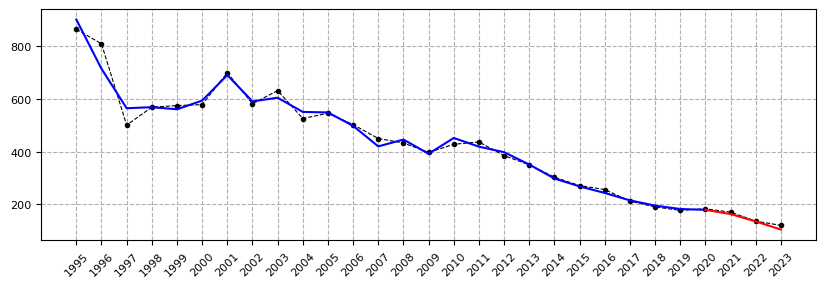

In [23]:
plot_pfl_dir(top_names_v, 'Julie', 3, 1, [0.5, 1], 8)

RMSE: 4.082



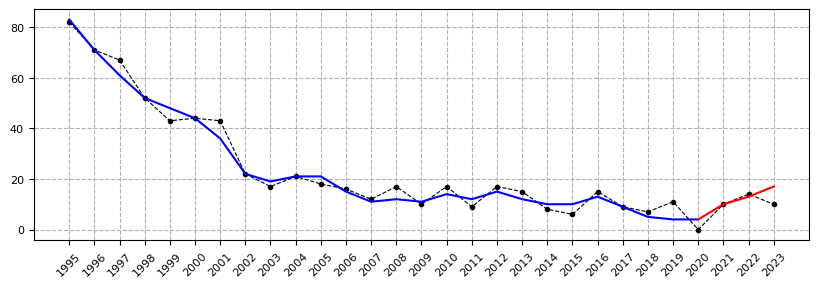

In [24]:
plot_pfl_dir(top_names_v, 'Laurence', 3, 1, [0.5, 1], 3)

RMSE: 5.196



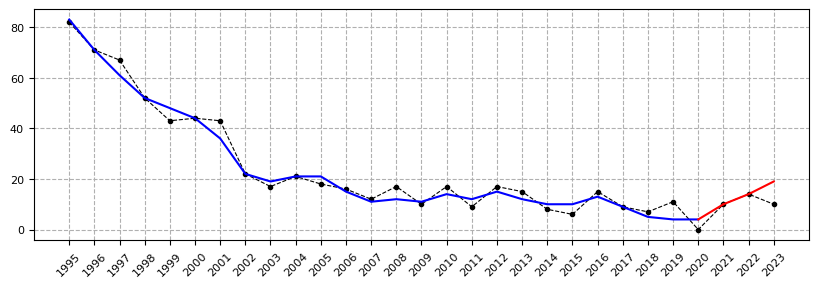

In [25]:
plot_pfl_recur(top_names_v, 'Laurence', 3, 1, [0.5, 1], 3)

In [26]:
def grid_search_pfl(df, naam, steps, d, periods, lags):

    row = pd.DataFrame(df[df['naam'] == naam].iloc[0,1:]).reset_index()
    row.columns = ['jaar', 'aantal']
    row['jaar'] = np.arange(0, df.shape[1]-1, 1)
    y = row['aantal']
    
    RMSE_min = 1000
    RMSE = []
    
    for i in range(len(d)):
        for j in range(len(periods)):
            for k in range(len(lags)):
    
                y_0, y_pred = predict_pfl_dir(df.iloc[:,:-steps], naam, steps, d[i], periods[j], lags[k])
                y2 = y_pred[-steps:]
                
                RMSE.append(round(mean_squared_error(y2, y[-steps:])**(1/2),3))
                
                if RMSE[-1] < RMSE_min:
                    i_f = i
                    j_f = j
                    k_f = k
                    RMSE_min = RMSE[-1]

    return d[i_f], periods[j_f], lags[k_f], RMSE_min

RMSE: 5.447



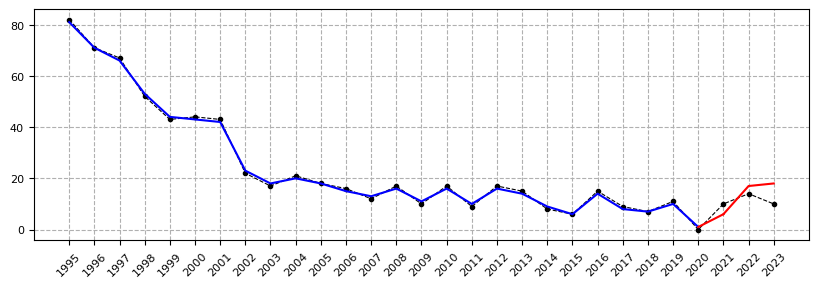

In [11]:
plot_pfl_dir_boosted(top_names_v, 'Laurence', 3, 0, [0.5], 7)

RMSE: 15.748



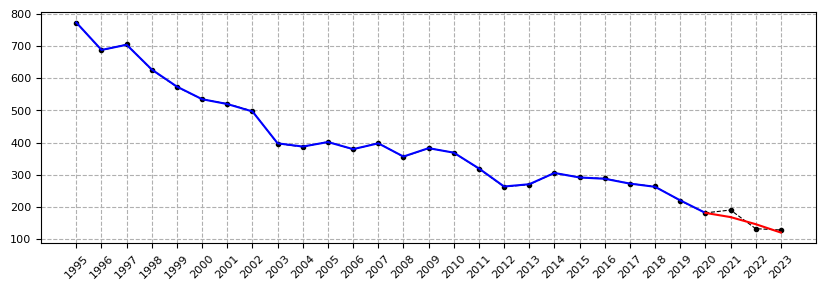

In [13]:
plot_pfl_dir_boosted(top_names_v, 'Charlotte', 3, 1, [0.5], 7)

In [27]:
start_time = time.time()

steps = 3

d = [0, 1, 2, 3, 4]
periods = [[0.5], [0.5, 1], [0.5, 1, 2], [0.5, 1, 2, 4]]
lags = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18]

df = top_names_v.sample(n=60, random_state=42)

top_names_v_gs = df.iloc[:,[0]]
top_names_v_gs.loc[:,['degree', 'periods', 'lags', 'RMSE_train']] = np.nan

for i in range(len(df)):

    d_hat, periods_hat, lags_hat, RMSE_hat = grid_search_pfl(df, df.iloc[i,0], steps, d, periods, lags)

    top_names_v_gs.iloc[i, 1] = d_hat
    top_names_v_gs.iloc[i, 3] = lags_hat
    top_names_v_gs.iloc[i, 2] = max(periods_hat)
    top_names_v_gs.iloc[i, 4] = RMSE_hat

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time: {elapsed_time:.5f} seconds")

Time: 141.21103 seconds


In [31]:
top_names_v_gs_60 = pd.read_csv("top_names_v_gs_60.csv")
top_names_v_gs_b_60 = pd.read_csv("top_names_v_gs_b_60.csv")

In [32]:
top_names_v_gs_60.describe()

,Unnamed: 0,degree,periods,lags,RMSE_train
count,60.000000,60.00000,60.000000,60.000000,60.00000
mean,6847.733333,1.05000,1.225000,6.583333,4.49665
std,3973.666875,1.14129,0.936207,4.167232,6.83975
min,104.000000,0.00000,0.500000,2.000000,0.00000
25%,3940.250000,0.00000,0.500000,3.750000,1.54750
50%,7002.000000,1.00000,1.000000,5.000000,2.91400
75%,10117.000000,2.00000,2.000000,8.000000,5.13025
max,13852.000000,4.00000,4.000000,18.000000,49.80300


In [33]:
top_names_v_gs_b_60.describe()

,Unnamed: 0,degree,periods,lags,RMSE_train
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,6847.733333,1.216667,1.116667,6.366667,4.543283
std,3973.666875,1.328841,0.860462,4.414793,7.813376
min,104.000000,0.000000,0.500000,2.000000,0.000000
25%,3940.250000,0.000000,0.500000,3.000000,1.383250
50%,7002.000000,1.000000,1.000000,5.000000,2.517000
75%,10117.000000,2.000000,1.000000,7.500000,4.777750
max,13852.000000,4.000000,4.000000,18.000000,58.893000


In [30]:
top_names_v_gs.describe()

,degree,periods,lags,RMSE_train
count,637.000000,637.000000,637.000000,637.000000
mean,0.978022,1.429356,6.252747,4.534265
std,1.125527,1.193089,3.874264,5.350827
min,0.000000,0.500000,2.000000,0.000000
25%,0.000000,0.500000,3.000000,1.633000
50%,1.000000,1.000000,5.000000,3.000000
75%,2.000000,2.000000,8.000000,5.477000
max,4.000000,4.000000,18.000000,49.803000


In [31]:
top_names_v_gs.head()

,naam,degree,periods,lags,RMSE_train
13,Aaliyah,0.0,0.5,3.0,4.933
75,Ada,2.0,4.0,8.0,4.397
104,Adeline,2.0,0.5,16.0,1.291
147,Adèle,2.0,0.5,2.0,5.568
198,Agathe,1.0,4.0,12.0,2.944


RMSE: 5.568



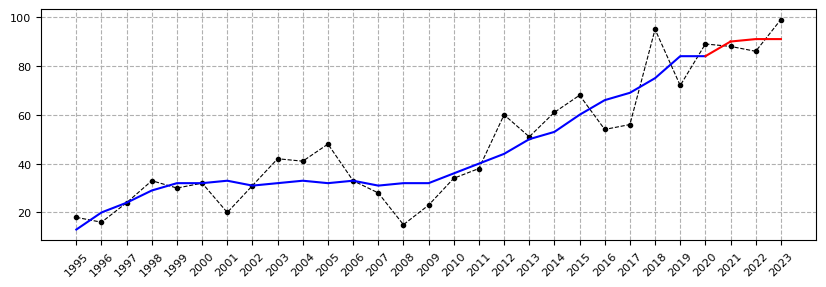

In [19]:
plot_pfl_dir(top_names_v, 'Adèle', 3, 2, [0.5], 2)

RMSE: 4.203



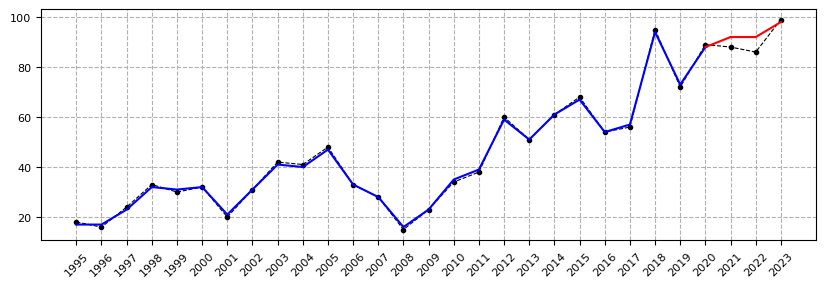

In [21]:
plot_pfl_dir_boosted(top_names_v, 'Adèle', 3, 1, [0.5, 1], 2)

RMSE: 4.397



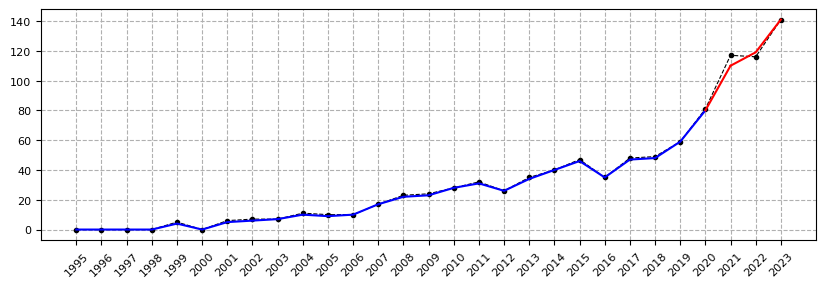

In [32]:
plot_pfl_dir(top_names_v, 'Ada', 3, 2, [0.5, 1, 2, 4], 8)

In [33]:
top_names_v_gs.loc[:,['2024_pred', '2025_pred']] = np.nan

In [34]:
start_time = time.time()

df = top_names_v
df.loc[:,['2024_pred', '2025_pred']] = np.nan
    
for i in range(len(top_names_v)):

    naam = df.iloc[i, 0]
    d = top_names_v_gs.iloc[i, 1].astype(int)
    max_period = top_names_v_gs.iloc[i, 2]
    lags = top_names_v_gs.iloc[i, 3].astype(int)
    steps = 2
    
    if max_period == 0.5:
        periods = [0.5]
    elif max_period == 1:
        periods = [0.5, 1]
    elif max_period == 2:
        periods = [0.5, 1, 2]
    else:
        periods = [0.5, 1, 2, 4]
    
    y_0, y_pred = predict_pfl_dir(df.iloc[:,:-steps], naam, steps, d, periods, lags)

    top_names_v_gs.iloc[i, -2] = y_pred.iloc[-2]
    top_names_v_gs.iloc[i, -1] = y_pred.iloc[-1]

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time: {elapsed_time:.5f} seconds")

Time: 4.38535 seconds


In [35]:
top_names_v_gs.head()

,naam,degree,periods,lags,RMSE_train,2024_pred,2025_pred
13,Aaliyah,0.0,0.5,3.0,4.933,29.0,30.0
75,Ada,2.0,4.0,8.0,4.397,222.0,264.0
104,Adeline,2.0,0.5,16.0,1.291,30.0,37.0
147,Adèle,2.0,0.5,2.0,5.568,94.0,91.0
198,Agathe,1.0,4.0,12.0,2.944,32.0,14.0


In [36]:
top_10_2024_pred_v = top_names_v_gs.sort_values(by='2024_pred', ascending=False).head(10)
top_10_2024_pred_v

,naam,degree,periods,lags,RMSE_train,2024_pred,2025_pred
2048,Camille,0.0,2.0,18.0,49.437,615.0,273.0
10324,Olivia,1.0,0.5,2.0,49.803,591.0,561.0
335,Alba,4.0,2.0,16.0,23.868,573.0,-89.0
938,Anna,4.0,1.0,5.0,13.342,481.0,704.0
12159,Sofia,2.0,2.0,2.0,21.610,438.0,550.0
3657,Emma,4.0,0.5,2.0,2.449,421.0,447.0
3885,Eva,1.0,1.0,9.0,14.399,407.0,457.0
7624,Louise,2.0,0.5,14.0,20.704,388.0,319.0
7756,Luna,2.0,4.0,2.0,20.960,362.0,375.0
410,Alice,0.0,0.5,7.0,14.480,353.0,354.0


In [37]:
top_10_2023_v = aantal_bel_v.sort_values(by='2023', ascending=False).head(10)
top_10_2023_v

,naam,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,1995-2023
10324,Olivia,88.0,90.0,78.0,88.0,85.0,70.0,71.0,119.0,138.0,...,538.0,587.0,613.0,554.0,651.0,548.0,580.0,636.0,587.0,9242
3657,Emma,235.0,260.0,326.0,485.0,565.0,651.0,631.0,654.0,722.0,...,645.0,662.0,634.0,608.0,563.0,529.0,500.0,457.0,429.0,17165
7624,Louise,312.0,322.0,357.0,403.0,410.0,447.0,378.0,371.0,393.0,...,596.0,565.0,595.0,545.0,515.0,432.0,455.0,445.0,365.0,13599
7288,Lina,27.0,39.0,58.0,56.0,63.0,90.0,85.0,112.0,134.0,...,360.0,413.0,375.0,362.0,388.0,411.0,394.0,383.0,362.0,7523
12159,Sofia,39.0,39.0,35.0,30.0,32.0,43.0,46.0,43.0,68.0,...,311.0,361.0,364.0,368.0,338.0,359.0,359.0,314.0,362.0,5506
410,Alice,137.0,137.0,148.0,148.0,142.0,164.0,129.0,154.0,150.0,...,428.0,428.0,423.0,422.0,407.0,361.0,416.0,364.0,356.0,7548
3885,Eva,250.0,263.0,251.0,260.0,257.0,245.0,256.0,256.0,305.0,...,275.0,264.0,265.0,266.0,277.0,281.0,280.0,282.0,352.0,7933
938,Anna,73.0,95.0,94.0,86.0,90.0,116.0,128.0,119.0,131.0,...,332.0,327.0,307.0,345.0,349.0,350.0,303.0,339.0,351.0,6606
9130,Mila,0.0,0.0,0.0,0.0,9.0,13.0,22.0,39.0,51.0,...,400.0,538.0,522.0,536.0,518.0,489.0,435.0,395.0,331.0,6439
6063,Juliette,78.0,106.0,137.0,169.0,193.0,216.0,220.0,232.0,228.0,...,404.0,384.0,364.0,373.0,378.0,332.0,346.0,293.0,325.0,8054


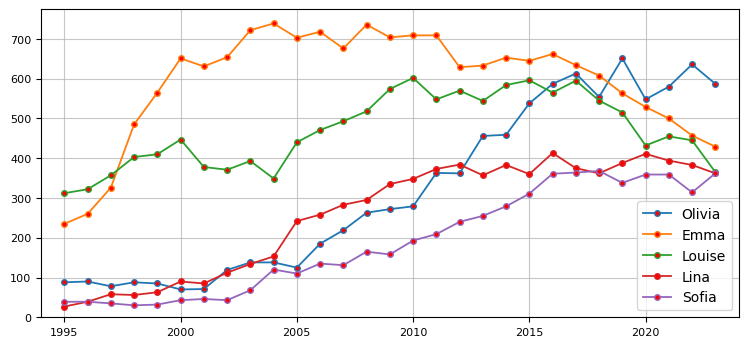

In [38]:
plot_name(aantal_bel_v, ['Olivia', 'Emma', 'Louise', 'Lina', 'Sofia'])

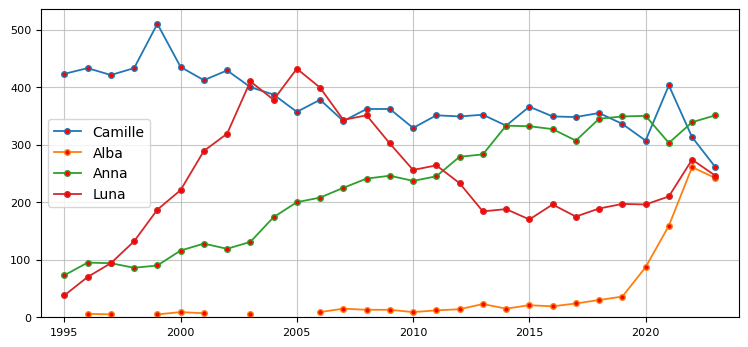

In [39]:
plot_name(aantal_bel_v, ['Camille', 'Alba', 'Anna', 'Luna'])

RMSE: 23.868



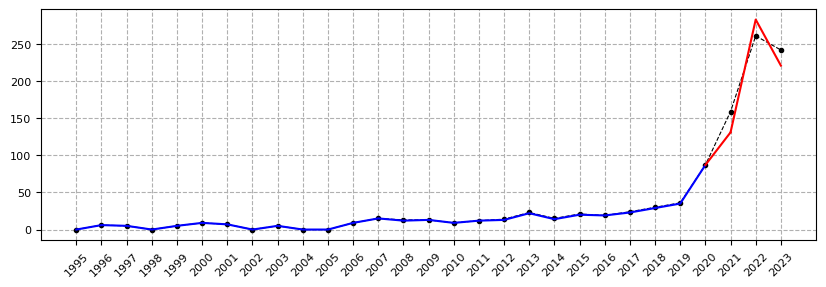

In [40]:
plot_pfl_dir(top_names_v.iloc[:,:-2], 'Alba', 3, 4, [0.5, 1, 2], 16)

RMSE: 23.868



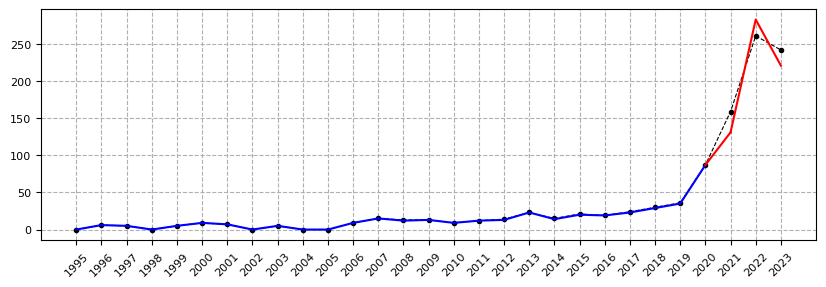

In [112]:
plot_pfl_dir_boosted(top_names_v.iloc[:,:-2], 'Alba', 3, 4, [0.5, 1, 2], 16)

RMSE: 4.397



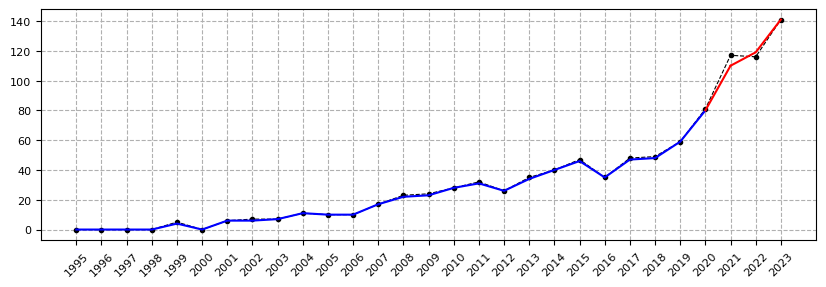

In [113]:
plot_pfl_dir_boosted(top_names_v.iloc[:,:-2], 'Ada', 3, 2, [0.5, 1, 2, 4], 8)